[View in Colaboratory](https://colab.research.google.com/github/saranyamandava/Lambda-School-DataScience/blob/master/Week_5_Coding_Challenge_3.ipynb)

## Coding Challenge #3

In this coding challenge, we will use Spearman's Rank to find the correlation between **categorical, non-linearly related and non-normally distributed variables**. You will gain exposure to 2 key concepts:

1) Spearman's Rank Correlation

2) Chi-Square tables (The Chi-Square method was covered in the "Goodness Of Fit" module. As a pre-requisite to this coding challenge, that module should be reviewed to understand the Chi-Square method)

As a guideline:

If the p-value is < 0.05 then you reject the null hypothesis and conclude that the variables are **correlated**

If the p-value is > 0.05 then you accept the null hypothesis and conclude that the variables are **independent**

When computing Spearman's Rank Correlation, you have to ensure the following:

a) The variables/attributes are numeric and able to be bucketed into categories

b) The variables are related non-lineraly

c) The variables are non-normally distibuted


Given this background on Spearman's Rank Correlation, there are 3 main objectives you need to accomplish:

1) Construct a Scatter Plot of cyl versus am, gear and carb (i.e. 3 different scatter plots) to verify that the variables are related non-lineraly and and are not-normally distributed. *A visual examination of the data proves that cycl, am, gear and carb are numeric variables that can be placed in categories.*

2) Compute the Spearman's Rank Correlation Coefficient

3) Conduct the Chi-Square test to ascertain how the 'cyl' variable is related to am, gear and carb


**Dataset to be used**: mtcars dataset that we have used in one of the previous sessions. The dataset is accessible via the following link:

https://gist.github.com/seankross/a412dfbd88b3db70b74b






In [0]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')

In [0]:
print (data.columns)
print (data.head(10))
print (data.shape)

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')
               model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   
5            Valiant  18.1    6  225.0  105  2.76  3.460  20.22   1   0     3   
6         Duster 360  14.3    8  360.0  245  3.21  3.570  15.84   0   0     3   
7          Merc 240D  24.4    4  146.7   62  3.69  3.190  20.00   1   0     4   
8           Merc 230  22.8    4  140.8   95  3.92  3.150  22.90   1   0     4   
9           Merc 280  19.2    6  167.6  123  3.92  3.440  18.30   

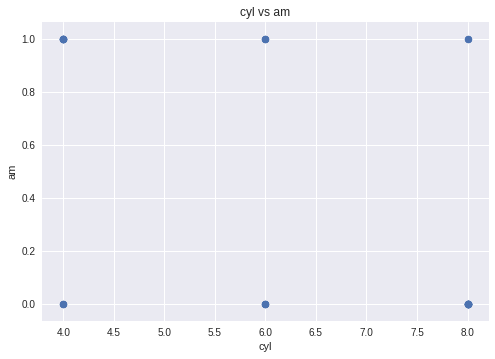

In [0]:
plt.scatter(data['cyl'],data['am'])
plt.xlabel("cyl")
plt.ylabel("am")
plt.title("cyl vs am")
plt.show()

From the above graph, we can observe that cyl and am are not linearly related.

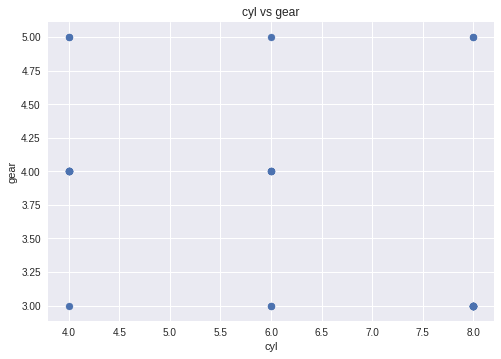

In [0]:
plt.scatter(data['cyl'],data['gear'])
plt.xlabel("cyl")
plt.ylabel("gear")
plt.title("cyl vs gear")
plt.show()

From the above graph, we can observe that cyl and gear are not linearly related.

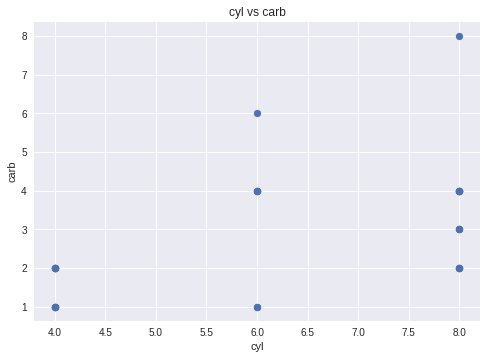

In [0]:
plt.scatter(data['cyl'],data['carb'])
plt.xlabel("cyl")
plt.ylabel("carb")
plt.title("cyl vs carb")
plt.show()

From the above graph, we can observe that cyl and carb are not linearly related.

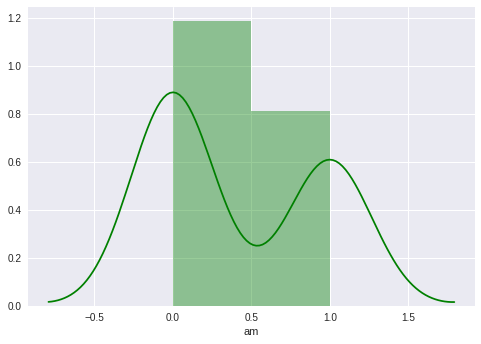

In [0]:
# Test the whether the data is normally distributed
import seaborn as sns
from scipy import stats

sns.distplot(data['am'],color = "g")

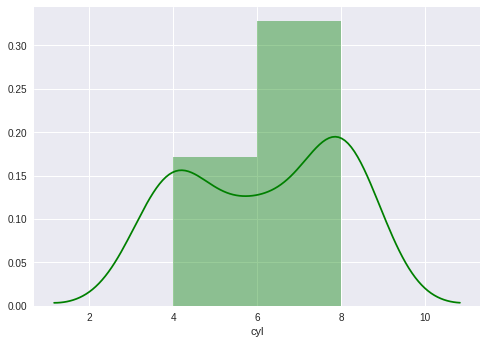

In [0]:
sns.distplot(data['cyl'],color = "g")


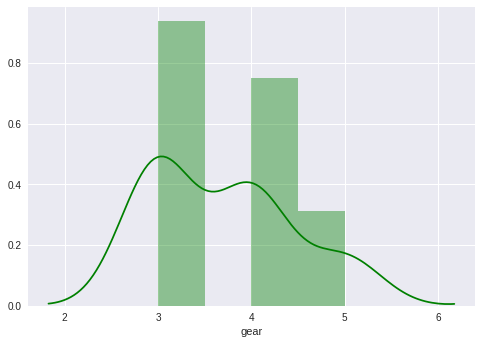

In [0]:
sns.distplot(data['gear'],color = "g")


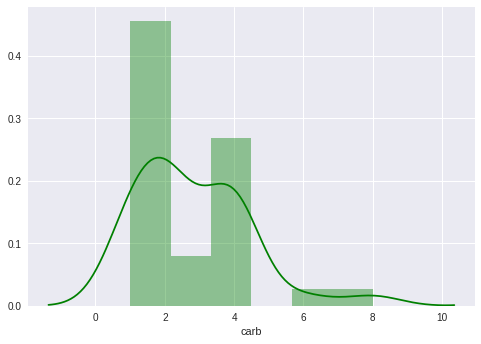

In [0]:
sns.distplot(data['carb'],color = "g")


From the above distribution plots for cyl,am,gear and carb. We can observe that, data is not normally distributed.

In [0]:
#2) Compute the Spearman's Rank Correlation Coefficient

from scipy.stats import spearmanr
spearmanr(data['cyl'], data['am'])

SpearmanrResult(correlation=-0.5220711818077188, pvalue=0.0021780464381859484)

In [0]:
spearmanr(data['cyl'], data['gear'])

SpearmanrResult(correlation=-0.5643104747017164, pvalue=0.0007678208835711609)

In [0]:
spearmanr(data['cyl'], data['carb'])

SpearmanrResult(correlation=0.580067978775226, pvalue=0.0005016643211749825)

In [0]:
# Since our data is categorical and unpaired, let's use Pearson's chi-square test to ascertain how the 'cyl' variable is related to am, gear and carb. 

#first we need to calcualte chi-square statistic.

#In order to calculate chi-square statistic,first we need get contigency table of the values.
con_cyl_am = pd.crosstab(data['cyl'],data['am'])
print (con_cyl_am)
print ("\n")

con_cyl_gear = pd.crosstab(data['cyl'],data['gear'])
print (con_cyl_gear)
print ("\n")

con_cyl_carb = pd.crosstab(data['cyl'],data['carb'])
print (con_cyl_carb)

am    0  1
cyl       
4     3  8
6     4  3
8    12  2


gear   3  4  5
cyl           
4      1  8  2
6      2  4  1
8     12  0  2


carb  1  2  3  4  6  8
cyl                   
4     5  6  0  0  0  0
6     2  0  0  4  1  0
8     0  4  3  6  0  1


from the above contingency tables, we can determine the degrees of freedom as 2.

In [0]:
from scipy.stats import chi2_contingency
chi2_cyl_am, p_cyl_am, dof, ex = chi2_contingency(con_cyl_am, correction=False)
chi2_cyl_gear, p_cyl_gear, dof, ex = chi2_contingency(con_cyl_gear, correction=False)
chi2_cyl_carb, p_cyl_carb, dof, ex = chi2_contingency(con_cyl_carb, correction=False)

test_values = pd.DataFrame([[chi2_cyl_am,p_cyl_am],[chi2_cyl_gear,p_cyl_gear],[chi2_cyl_carb,p_cyl_carb]])
test_values.columns = ['chi2','p-value']
test_values.index = ['cyl-am','cyl-gear','cyl-carb']
print (test_values)


               chi2   p-value
cyl-am     8.740733  0.012647
cyl-gear  18.036364  0.001214
cyl-carb  24.388868  0.006632


with 2 degrees of freedom, for chi2 value of 7.378, p-value is 0.025 and for chi2 values greater than 9.210, p-value is less than 0.01.
With this information, since all our chi2 values are greater than 7.378, p-values are less than 0.5
Hence, we can say variables are not independent. \\
Reference values: https://www.google.com/search?biw=1280&bih=726&tbm=isch&sa=1&ei=1BzqWoaUBoTXjwSB7LOwAg&q=chi+square+distribution+table+for+degrees+of+freedom+1-100&oq=degrees+of+freedom+chi+distribution+table&gs_l=psy-ab.1.0.0i8i30k1.7647.8516.0.12621.4.4.0.0.0.0.138.491.0j4.4.0....0...1c.1.64.psy-ab..0.4.488...0i13k1j0i8i7i30k1j0i8i13i30k1.0.op3YhnDtZho#imgrc=JD49uYWAQybeIM:
